# PLP Python Final Project
# 🌍 COVID-19 Global Trends Analysis & Storytelling


**Author:** *Samuel Musyoka*  
**Date:** *May 12th,2025*

---

**Webmap:** [Covid19 Webmap](plp-python-final.onrender.com), ⬅click to view or just scroll down

---

##  Objective

In this analysis, we explore the global trends of the COVID-19 pandemic through data. We will examine cases, deaths, and vaccinations over time, compare countries, and derive insights that highlight disparities, progress, and anomalies in the global response.

---

##  Dataset

The dataset used is the [Our World in Data COVID-19 dataset](https://ourworldindata.org/covid-cases), which includes:
- Daily case and death counts
- Vaccination statistics
- Testing rates
- Healthcare capacity
- Socioeconomic indicators

---


In [2]:
# 📊 Load and preview data
import pandas as pd

# Load the dataset
df = pd.read_csv("owid-covid-data.csv")

# Preview the data
df.head()

iso_code continent     location        date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan  2020-01-03          NaN        0.0   
1      AFG      Asia  Afghanistan  2020-01-04          NaN        0.0   
2      AFG      Asia  Afghanistan  2020-01-05          NaN        0.0   
3      AFG      Asia  Afghanistan  2020-01-06          NaN        0.0   
4      AFG      Asia  Afghanistan  2020-01-07          NaN        0.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0                 NaN           NaN         0.0                  NaN  ...   
1                 NaN           NaN         0.0                  NaN  ...   
2                 NaN           NaN         0.0                  NaN  ...   
3                 NaN           NaN         0.0                  NaN  ...   
4                 NaN           NaN         0.0                  NaN  ...   

   male_smokers  handwashing_facilities  hospital_beds_per_thousand  \
0           NaN                  37.746                         0.5   
1           NaN                  37.746                         0.5   
2           NaN                  37.746                         0.5   
3           NaN                  37.746                         0.5   
4           NaN                  37.746                         0.5   

   life_expectancy  human_development_index  population  \
0            64.83                    0.511  41128772.0   
1            64.83                    0.511  41128772.0   
2            64.83                    0.511  41128772.0   
3            64.83                    0.511  41128772.0   
4            64.83                    0.511  41128772.0   

   excess_mortality_cumulative_absolute  excess_mortality_cumulative  \
0                                   NaN                          NaN   
1                                   NaN                          NaN   
2                                   NaN                          NaN   
3                                   NaN                          NaN   
4                                   NaN                          NaN   

   excess_mortality  excess_mortality_cumulative_per_million  
0               NaN                                      NaN  
1               NaN                                      NaN  
2               NaN                                      NaN  
3               NaN                                      NaN  
4               NaN                                      NaN  

[5 rows x 67 columns]

In [3]:
# 🧹 Data Cleaning
df['date'] = pd.to_datetime(df['date'])
df = df[df['continent'].notnull()]  # Remove aggregate entries like 'World'

# Focus on a few countries for comparative analysis
countries = ['United States', 'India', 'Brazil', 'Kenya', 'Germany','China','South Africa']
df_countries = df[df['location'].isin(countries)]

# Fill missing values in key columns
#df_countries = df_countries.ffill()
#the above line is commented out since it is wrongly filling the data

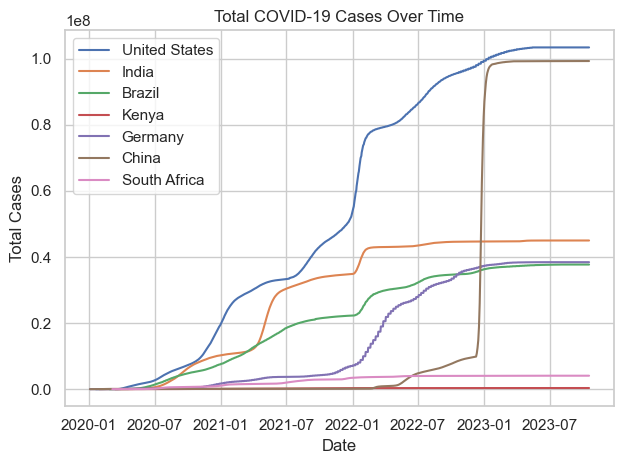

In [4]:

# 📈 Exploratory Data Analysis
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")  # Use seaborn's style

# Total Cases Over Time
for country in countries:
    subset = df_countries[df_countries['location'] == country]
    plt.plot(subset['date'], subset['total_cases'], label=country)

plt.title("Total COVID-19 Cases Over Time")
plt.xlabel("Date")
plt.ylabel("Total Cases")
plt.legend()
plt.tight_layout()
plt.show()


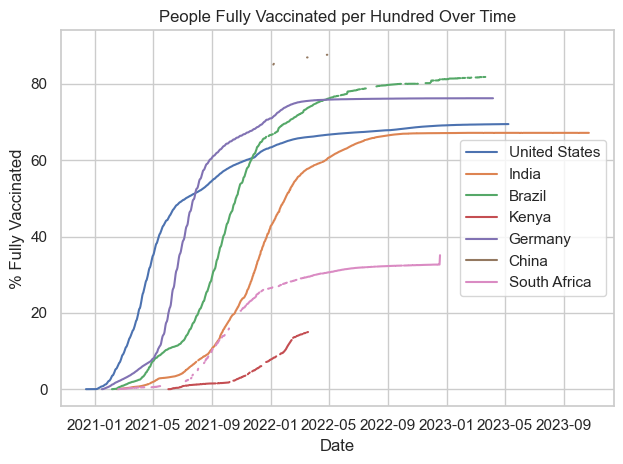

In [5]:
# 💉 Vaccination Progress
for country in countries:
    subset = df_countries[df_countries['location'] == country]
    plt.plot(subset['date'], subset['people_fully_vaccinated_per_hundred'], label=country)

plt.title("People Fully Vaccinated per Hundred Over Time")
plt.xlabel("Date")
plt.ylabel("% Fully Vaccinated")
plt.legend()
plt.tight_layout()
plt.show()

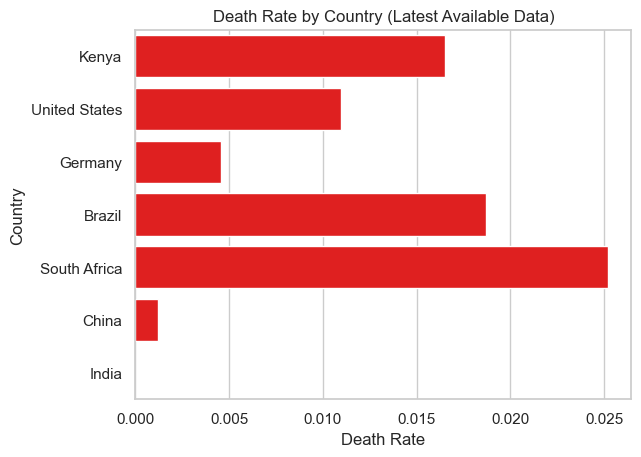

In [6]:
# ⚰️ Death Rate Calculation
df_latest = df_countries.sort_values('date').groupby('location').tail(1)
df_latest['death_rate'] = df_latest['total_deaths'] / df_latest['total_cases']

# Bar chart
sns.barplot(x='death_rate', y='location', data=df_latest, color='red')
plt.title("Death Rate by Country (Latest Available Data)")
plt.xlabel("Death Rate")
plt.ylabel("Country")
plt.show()


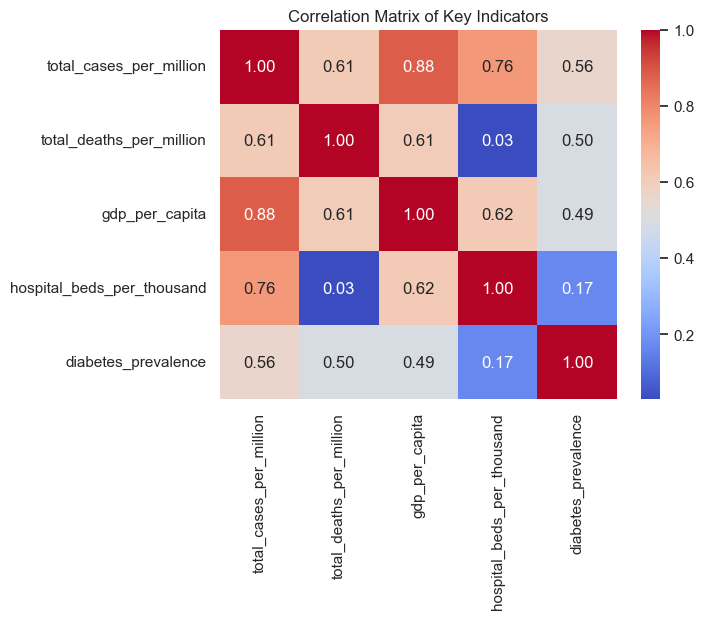

In [7]:
# 🔥 Correlation Heatmap
corr_df = df_latest[['total_cases_per_million', 'total_deaths_per_million','gdp_per_capita',
                     'hospital_beds_per_thousand', 'diabetes_prevalence']]

sns.heatmap(corr_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Key Indicators")
plt.show()

## 🧠 Key Insights & Storytelling

1. **Vaccine Rollout Disparity:** Wealthier nations like Germany and the USA achieved over 70% full vaccination rates, while Kenya lags behind significantly.
2. **Death Rate Variation:** Despite having similar case counts, death rates vary widely due to healthcare quality, testing, and early response.
3. **GDP Correlation:** There is a visible positive correlation between GDP per capita and vaccination rates, highlighting inequality.
4. **Waves of Infection:** India and Brazil experienced sharp peaks in new cases during early waves, which later stabilized with vaccinations.
5. **Healthcare Indicators Matter:** Countries with more hospital beds per capita and higher health indices show lower death rates.


## ✅ Conclusion

This analysis demonstrates that while COVID-19 was a global crisis, its effects were deeply unequal. By examining trends in vaccination, testing, and mortality, we gain a clearer picture of how public health infrastructure and socioeconomic status influenced outcomes.



*Thank you for going through my presentation❤.*  


# 🌍 Global COVID-19 Data Map

This interactive map visualizes the number of COVID-19 pandemic around the world, using the latest available data.

## 📌 How to Use
- Scroll down and wait for the map to render.
- Hover over or click on a country to explore vaccination data visually.
- Darker colors represent higher numbers of fully vaccinated individuals.
- Click the arrow in the date section to change date range.
- use the dropdowns to alter with the map and data displayed.
- If the map doesn't appear:
  - Make sure the code cell below is executed.
  - Ensure you’re running the notebook in a compatible environment like Jupyter Notebook or JupyterLab.
  - Try restarting the kernel and running all cells again.

## 🛠 Data Sources
- **Geospatial Data**: `world-countries.json` (GeoJSON file with world boundaries).
- **COVID Data**: `covid-world-vaccination-progress.csv` from [Our World in Data](https://ourworldindata.org/covid-vaccinations).

## 📊 Notes
- The dataset is grouped by country, showing the **latest recorded count** of people fully vaccinated.
- The map is color-coded using the `YlGnBu` scale for easy interpretation.

## run this prior
''
!pip install pandas folium
''

In [10]:
import dash
from dash import dcc, html, Input, Output, State, callback_context
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
import json
from datetime import datetime
import numpy as np

# Load the COVID-19 data
def load_covid_data():
    try:
        # Reading the CSV with custom handling for potential issues
        # This assumes the file is uploaded in the same directory
        df = pd.read_csv('owid-covid-data.csv', low_memory=False)
        
        # Convert date to datetime format
        df['date'] = pd.to_datetime(df['date'])
        
        # Create a latest data dataframe
        latest_data = df.sort_values('date').groupby('location').last().reset_index()
        
        return df, latest_data
    except Exception as e:
        print(f"Error loading COVID data: {e}")
        return pd.DataFrame(), pd.DataFrame()

# Load the world GeoJSON data
def load_geojson():
    try:
        # Reading the GeoJSON file
        with open('countries.json', 'r') as f:
            geo_json = json.load(f)
        return geo_json
    except Exception as e:
        print(f"Error loading GeoJSON: {e}")
        return {}

# Load data
df, latest_data = load_covid_data()
geo_json = load_geojson()

# Create a list of available metrics for dropdown
available_metrics = [
    {'label': 'Total Cases', 'value': 'total_cases'},
    {'label': 'Total Deaths', 'value': 'total_deaths'},
    {'label': 'Cases per Million', 'value': 'total_cases_per_million'},
    {'label': 'Deaths per Million', 'value': 'total_deaths_per_million'},
    {'label': 'Reproduction Rate', 'value': 'reproduction_rate'},
    {'label': 'ICU Patients', 'value': 'icu_patients'},
    {'label': 'Hospital Patients', 'value': 'hosp_patients'},
    {'label': 'Total Vaccinations', 'value': 'total_vaccinations'},
    {'label': 'People Fully Vaccinated', 'value': 'people_fully_vaccinated'},
    {'label': 'People Fully Vaccinated (%)', 'value': 'people_fully_vaccinated_per_hundred'}
]

# Initialize the Dash app
app = dash.Dash(__name__, suppress_callback_exceptions=True)

# Create color scales for different metrics
color_scales = {
    'total_cases': 'Reds',
    'total_deaths': 'Reds',
    'total_cases_per_million': 'Oranges',
    'total_deaths_per_million': 'Oranges',
    'reproduction_rate': 'RdYlBu_r',
    'icu_patients': 'Purples',
    'hosp_patients': 'Purples',
    'total_vaccinations': 'Blues',
    'people_fully_vaccinated': 'Blues',
    'people_fully_vaccinated_per_hundred': 'Greens',
}

# App layout
app.layout = html.Div([
    # Header
    html.Div([
        html.H1("COVID-19 World Dashboard", style={'textAlign': 'center', 'color': '#2C3E50', 'marginBottom': '10px'}),
        html.P("Interactive visualization of COVID-19 data across the world", 
               style={'textAlign': 'center', 'color': '#7F8C8D', 'marginBottom': '20px'})
    ], style={'padding': '20px', 'backgroundColor': '#F5F7FA', 'borderRadius': '10px', 'marginBottom': '20px'}),
    
    # Controls and Main Content
    html.Div([
        # Controls Panel
        html.Div([
            html.H3("Controls", style={'marginBottom': '15px', 'color': '#2C3E50'}),
            
            # Metric Selection
            html.Label("Select Metric:", style={'fontWeight': 'bold', 'marginBottom': '10px'}),
            dcc.Dropdown(
                id='metric-dropdown',
                options=available_metrics,
                value='total_cases_per_million',
                clearable=False,
                style={'marginBottom': '20px'}
            ),
            
            # Date Selection
            html.Label("Select Date Range:", style={'fontWeight': 'bold', 'marginBottom': '10px'}),
            dcc.DatePickerRange(
                id='date-picker-range',
                min_date_allowed=df['date'].min() if not df.empty else datetime(2020, 1, 1),
                max_date_allowed=df['date'].max() if not df.empty else datetime(2023, 12, 31),
                start_date=df['date'].max() - pd.Timedelta(days=30) if not df.empty else datetime(2023, 11, 1),
                end_date=df['date'].max() if not df.empty else datetime(2023, 12, 1),
                style={'marginBottom': '20px'}
            ),
            
            # Continent Filter
            html.Label("Filter by Continent:", style={'fontWeight': 'bold', 'marginBottom': '10px'}),
            dcc.Dropdown(
                id='continent-dropdown',
                options=[{'label': 'All', 'value': 'All'}] + 
                        [{'label': c, 'value': c} for c in sorted(df['continent'].dropna().unique())] if not df.empty else [],
                value='All',
                clearable=False,
                style={'marginBottom': '20px'}
            ),
            
            # Country Filter
            html.Label("Search Country:", style={'fontWeight': 'bold', 'marginBottom': '10px'}),
            dcc.Dropdown(
                id='country-dropdown',
                options=[{'label': c, 'value': c} for c in sorted(df['location'].unique())] if not df.empty else [],
                value=None,
                clearable=True,
                searchable=True,
                placeholder="Type to search...",
                style={'marginBottom': '20px'}
            ),
            
            # Info Box
            html.Div([
                html.H4("Global Statistics", id="stats-header", style={'marginBottom': '10px', 'color': '#2C3E50'}),
                html.Div(id="stats-content", style={'marginBottom': '10px'})
            ], style={'padding': '15px', 'backgroundColor': '#EBF5FB', 'borderRadius': '5px'})
            
        ], style={'width': '25%', 'padding': '20px', 'backgroundColor': '#F8F9F9', 'borderRadius': '10px', 'marginRight': '20px'}),
        
        # Main Content Panel
        html.Div([
            # Map and Charts
            html.Div([
                # World Map
                html.Div([
                    dcc.Graph(id='world-map', style={'height': '500px'})
                ], style={'marginBottom': '20px', 'padding': '15px', 'backgroundColor': '#F8F9F9', 'borderRadius': '10px'}),
                
                # Time Series Chart
                html.Div([
                    dcc.Graph(id='time-series', style={'height': '300px'})
                ], style={'padding': '15px', 'backgroundColor': '#F8F9F9', 'borderRadius': '10px'})
            ])
        ], style={'width': '75%'})
    ], style={'display': 'flex', 'flexDirection': 'row'}),
    
    # Footer
    html.Div([
        html.P(f"Data last updated: {df['date'].max().strftime('%B %d, %Y') if not df.empty else 'Unknown'}", 
               style={'textAlign': 'center', 'fontSize': '0.8em', 'color': '#7F8C8D'})
    ], style={'padding': '10px', 'marginTop': '20px'})
], style={'fontFamily': 'Arial, sans-serif', 'margin': '0 auto', 'maxWidth': '1400px', 'padding': '20px'})

# Callback to update continent-based country filter
@app.callback(
    Output('country-dropdown', 'options'),
    [Input('continent-dropdown', 'value')]
)
def update_country_options(selected_continent):
    if df.empty:
        return []
    
    if selected_continent == 'All':
        filtered_countries = sorted(df['location'].unique())
    else:
        filtered_countries = sorted(df[df['continent'] == selected_continent]['location'].unique())
    
    return [{'label': country, 'value': country} for country in filtered_countries]

# Callback to update the map
@app.callback(
    Output('world-map', 'figure'),
    [Input('metric-dropdown', 'value'),
     Input('date-picker-range', 'end_date'),
     Input('continent-dropdown', 'value'),
     Input('country-dropdown', 'value')]
)
def update_map(selected_metric, end_date, selected_continent, selected_country):
    if df.empty or not end_date:
        # Return empty figure if data is not available
        return go.Figure()
    
    # Filter data by date
    end_date = pd.to_datetime(end_date)
    filtered_df = df[df['date'] <= end_date]
    
    # Get the latest data for each country by the selected end date
    latest_by_date = filtered_df.sort_values('date').groupby('location').last().reset_index()
    
    # Further filter by continent if selected
    if selected_continent != 'All':
        latest_by_date = latest_by_date[latest_by_date['continent'] == selected_continent]
    
    # Filter for a specific country if selected
    highlight_country = None
    if selected_country:
        highlight_country = selected_country
    
    # Create choropleth map
    if 'iso_code' in latest_by_date.columns:
        # Determine color scale based on metric
        color_scale = color_scales.get(selected_metric, 'Viridis')
        
        # Format hover text
        hovertext = []
        for _, row in latest_by_date.iterrows():
            country_text = f"<b>{row['location']}</b><br>"
            country_text += f"Date: {row['date'].strftime('%Y-%m-%d')}<br>"
            
            # Add metrics to hover text
            for metric in available_metrics:
                metric_val = metric['value']
                if metric_val in row and pd.notna(row[metric_val]):
                    formatted_val = format_value(row[metric_val], metric_val)
                    country_text += f"{metric['label']}: {formatted_val}<br>"
            
            hovertext.append(country_text)
        
        # Create the figure
        fig = px.choropleth(
            latest_by_date,
            locations="iso_code",
            color=selected_metric,
            hover_name="location",
            color_continuous_scale=color_scale,
            projection="natural earth",
            locationmode='ISO-3',
            labels={selected_metric: get_metric_label(selected_metric)},
            scope="world",
            basemap_visible=True,
            height=600
        )
        
        # Highlight selected country if any
        if highlight_country:
            country_data = latest_by_date[latest_by_date['location'] == highlight_country]
            if not country_data.empty:
                iso_code = country_data.iloc[0]['iso_code']
                fig.add_trace(go.Choropleth(
                    locations=[iso_code],
                    z=[1],
                    locationmode='ISO-3',
                    showscale=False,
                    marker=dict(line=dict(color='black', width=2)),
                    hoverinfo='none'
                ))
        
        # Update layout
        fig.update_layout(
            title=f"{get_metric_label(selected_metric)} by Country (as of {end_date.strftime('%Y-%m-%d')})",
            geo=dict(
                showframe=False,
                showcoastlines=True,
                projection_type='equirectangular'
            ),
            margin={"r": 0, "t": 30, "l": 0, "b": 0},
            coloraxis_colorbar=dict(
                title=get_metric_label(selected_metric)
            )
        )
        
        return fig
    else:
        # Return empty figure if ISO codes are not available
        return go.Figure()

# Callback to update time series
@app.callback(
    Output('time-series', 'figure'),
    [Input('metric-dropdown', 'value'),
     Input('date-picker-range', 'start_date'),
     Input('date-picker-range', 'end_date'),
     Input('country-dropdown', 'value')]
)
def update_time_series(selected_metric, start_date, end_date, selected_country):
    if df.empty or not start_date or not end_date:
        # Return empty figure if data is not available
        return go.Figure()
    
    # Convert dates to datetime
    start_date = pd.to_datetime(start_date)
    end_date = pd.to_datetime(end_date)
    
    # Filter by date range
    date_filtered = df[(df['date'] >= start_date) & (df['date'] <= end_date)]
    
    # Create figure
    fig = go.Figure()
    
    # Add global or continental average if no specific country is selected
    if not selected_country:
        # Group by date and calculate mean for the metric
        global_avg = date_filtered.groupby('date')[selected_metric].mean().reset_index()
        global_avg = global_avg.dropna(subset=[selected_metric])
        
        if not global_avg.empty:
            fig.add_trace(go.Scatter(
                x=global_avg['date'],
                y=global_avg[selected_metric],
                mode='lines',
                name='Global Average',
                line=dict(color='#3498DB', width=2)
            ))
    else:
        # Filter for selected country
        country_data = date_filtered[date_filtered['location'] == selected_country]
        country_data = country_data.dropna(subset=[selected_metric])
        
        if not country_data.empty:
            fig.add_trace(go.Scatter(
                x=country_data['date'],
                y=country_data[selected_metric],
                mode='lines+markers',
                name=selected_country,
                line=dict(color='#E74C3C', width=2),
                marker=dict(size=5)
            ))
    
    # Update layout
    fig.update_layout(
        title=f"{get_metric_label(selected_metric)} Over Time" + 
              (f" for {selected_country}" if selected_country else " - Global Average"),
        xaxis_title="Date",
        yaxis_title=get_metric_label(selected_metric),
        template="plotly_white",
        margin=dict(l=40, r=40, t=40, b=40),
        legend=dict(
            orientation="h",
            yanchor="bottom",
            y=1.02,
            xanchor="right",
            x=1
        )
    )
    
    return fig

# Callback to update stats content
@app.callback(
    [Output('stats-header', 'children'),
     Output('stats-content', 'children')],
    [Input('metric-dropdown', 'value'),
     Input('date-picker-range', 'end_date'),
     Input('country-dropdown', 'value')]
)
def update_stats(selected_metric, end_date, selected_country):
    if df.empty or not end_date:
        return "No Data Available", "Please check your data source."
    
    # Convert end_date to datetime
    end_date = pd.to_datetime(end_date)
    
    # Filter data by date
    filtered_df = df[df['date'] <= end_date]
    latest_by_date = filtered_df.sort_values('date').groupby('location').last().reset_index()
    
    if selected_country:
        # Show stats for selected country
        country_data = latest_by_date[latest_by_date['location'] == selected_country]
        if country_data.empty:
            return f"No Data for {selected_country}", "Please select another country or date range."
        
        country_row = country_data.iloc[0]
        
        # Prepare detailed stats
        stats = []
        for metric in available_metrics:
            metric_val = metric['value']
            if metric_val in country_row and pd.notna(country_row[metric_val]):
                formatted_val = format_value(country_row[metric_val], metric_val)
                stats.append(html.Div([
                    html.Strong(f"{metric['label']}: "),
                    html.Span(formatted_val)
                ]))
        
        # Add extra country info if available
        extra_info = []
        for info_field in ['population', 'population_density', 'median_age', 'gdp_per_capita', 'life_expectancy']:
            if info_field in country_row and pd.notna(country_row[info_field]):
                formatted_val = format_value(country_row[info_field], info_field)
                label = info_field.replace('_', ' ').title()
                extra_info.append(html.Div([
                    html.Strong(f"{label}: "),
                    html.Span(formatted_val)
                ]))
        
        if extra_info:
            stats.append(html.Hr(style={'margin': '10px 0'}))
            stats.extend(extra_info)
        
        return f"Statistics for {selected_country}", stats
    else:
        # Show global stats
        global_stats = []
        
        # Calculate global metrics
        for metric in available_metrics:
            metric_val = metric['value']
            if metric_val in latest_by_date.columns:
                valid_data = latest_by_date[latest_by_date[metric_val].notna()]
                if not valid_data.empty:
                    avg_val = valid_data[metric_val].mean()
                    max_val = valid_data[metric_val].max()
                    max_country = valid_data.loc[valid_data[metric_val].idxmax(), 'location']
                    
                    formatted_avg = format_value(avg_val, metric_val)
                    formatted_max = format_value(max_val, metric_val)
                    
                    global_stats.append(html.Div([
                        html.Strong(f"{metric['label']}: "),
                        html.Span(f"Global Avg: {formatted_avg}, Max: {formatted_max} ({max_country})")
                    ]))
        
        return "Global Statistics", global_stats

# Helper function to get human-readable metric labels
def get_metric_label(metric):
    metric_labels = {
        'total_cases': 'Total Cases',
        'total_deaths': 'Total Deaths',
        'total_cases_per_million': 'Cases per Million',
        'total_deaths_per_million': 'Deaths per Million',
        'reproduction_rate': 'Reproduction Rate',
        'icu_patients': 'ICU Patients',
        'hosp_patients': 'Hospital Patients',
        'total_vaccinations': 'Total Vaccinations',
        'people_fully_vaccinated': 'People Fully Vaccinated',
        'people_fully_vaccinated_per_hundred': 'People Fully Vaccinated (%)'
    }
    return metric_labels.get(metric, metric.replace('_', ' ').title())

# Helper function to format values based on metric type
def format_value(value, metric):
    if pd.isna(value):
        return "N/A"
    
    if 'rate' in metric:
        return f"{value:.2f}"
    elif 'per_hundred' in metric:
        return f"{value:.1f}%"
    elif 'per_million' in metric or 'per_thousand' in metric:
        return f"{value:,.1f}"
    elif 'gdp' in metric:
        return f"${value:,.0f}"
    elif metric in ['total_cases', 'total_deaths', 'new_cases', 'new_deaths', 'population']:
        return f"{int(value):,}"
    else:
        return f"{value:,.2f}"

# Run the app
if __name__ == '__main__':
    app.run(debug=True)